# Assumptions of the Linear Regression Model
Module 1 | Chapter 1 | Notebook 4

***
In this notebook we will turn to the assumptions of the linear regression model. To do this, you will learn about Anscombe's quartet. It shows that a visualization of the data can reveal surprising things. By the end of this exercise you will be able to:
* Generate a residual plot
* Check the assumptions of the linear regression model
***


## Anscombe's quartet


Before we return to the problems of the Taiwanese real estate investor in the next lesson, we should take a look at the assumptions of the regression model. These are:
1. The data points are independent from each other
2. There is a linear dependency between feature and target
3. The residuals are normally distributed
4. The residuals have a constant variance

It turns out that the model quality metrics, which we learned about in the previous lesson, are not necessarily sufficient to evaluate a linear regression model.

To see why, let's use a fictional data set from the mathematician Anscombe with four parts: Anscombe's Quartet. Each smaller data set has eleven data points, the same mean value, the same dispersion, the same regression parameters, and the same values for  *mean squared error* and *R²*. 

The data set is included in the `seaborn` module. Let's take a look at it. Think of `'y'` as target values, such as house prices, whereas `'x'`, a feature, should represent the house age, for example.


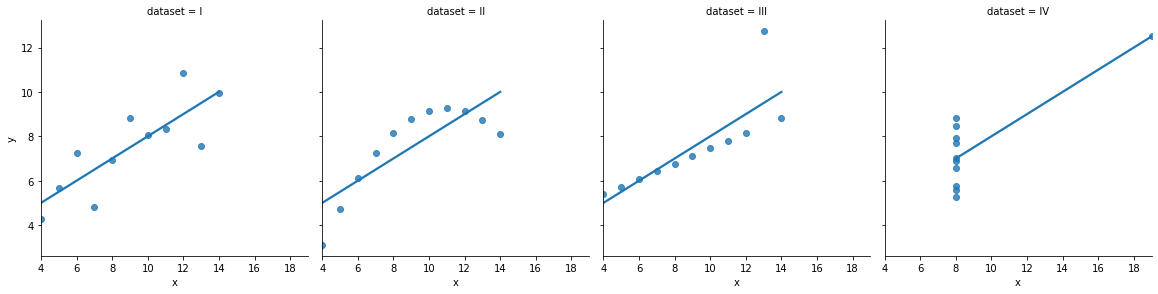

In [1]:
import seaborn as sns
df_anscombe = sns.load_dataset("anscombe", cache=False)
sns.lmplot(x="x",
           y="y",
           col="dataset",
           data=df_anscombe,
           ci=None,
           height=4);

The first partial data set on the far left is roughly what data scientists have in mind when they think of linear regression: Points lie randomly scattered around the regression line.

In all the other data sets the points are not at all randomly scattered around the regression line. In the second data set they show a clear structure. A linear model with a simple straight line is not a good description of the data. In this case you should actually use a different model.

In the third case, there is indeed a linear dependency between `'x'` and `'y'`, but it is not as strong as described by the regression line. A single extreme data point, an outlier, pulls the slope of the regression line upwards.

In the fourth data set, an association between `'x'` and `'y'` is only simulated by a single data point. Ten of the eleven data points are on the same`'x'` value and therefore do not show any connection between `'x'` and `'y'`.

Let's take a closer look at the raw data from Anscombe's quartet with some examples. Print the first twenty rows and all the columns of `df_anscombe`.


In [2]:
df_anscombe.head(20)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


`df_anscombe` consists of a categorical column (`'dataset'`), which assigns the rows to the datasets, and two continuous columns (`'x'` and `'y'`), which simulate two associated data series. Imagine that `'y'` is a predicted target data series and `'x'` is a feature.

Use the `my_df.groupby()` method to go check whether all four data sets in `df_anscombe` really have the same mean value for `'x'` and `'y'`.


In [3]:
df_anscombe.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


What about the regression parameters (intercept and slope)? Are they really the same for all four data sets in `df_anscombe`? Print them for each category in the `'dataset'` column.


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

for category in df_anscombe.loc[:, 'dataset'].unique():
    mask = df_anscombe.loc[:, 'dataset'] == category

    features = df_anscombe_cat = df_anscombe.loc[mask, ['x']]
    target = df_anscombe_cat = df_anscombe.loc[mask, 'y']
    model.fit( features, target)

    print(category)
    print(model.coef_)
    print(model.intercept_)

I
[0.50009091]
3.0000909090909094
II
[0.5]
3.00090909090909
III
[0.49972727]
3.002454545454545
IV
[0.49990909]
3.0017272727272726


Although the four parts of Anscombe's quartet look extremely different, they have the same linear regression parameters (intercept of about 3 and slope of about 0.5). Now print the model quality metrics for each of the four linear regressions of the small data sets in Anscombe's quartet.


In [5]:
from sklearn.metrics import mean_squared_error,r2_score

for category in df_anscombe.loc[:, 'dataset'].unique():
    mask = df_anscombe.loc[:, 'dataset'] == category

    features =  df_anscombe.loc[mask, ['x']]
    target = df_anscombe.loc[mask, 'y']
    model.fit(features, target)

    target_pred = model.predict(features)
    # target_pred = [  1, 2,3,4,5,6,7,8,9,10,11 ]

    print(category)
    print(round( mean_squared_error(target, target_pred),4))
    print(round(r2_score(target, target_pred),3))

I
1.2512
0.667
II
1.2524
0.666
III
1.2506
0.666
IV
1.2493
0.667


Intuitively, a linear regression in the first sub-data set of Anscombe's quartet seems much more appropriate than in the other sub-data sets. Nevertheless the model quality metrics for all four sub-data sets are the same: a mean squared error of 1.25 and a coefficient of determination of 0.67.

Anscombe's quartet impressively demonstrates that you should not trust the model quality metrics blindly. They are generally very useful. However, they are not suitable to check the assumptions of the linear regression model.


**Congratulations:** It is generally a good idea to evaluate models with model quality metrics Nevertheless, you should still always look at the data. You have used Anscombe's quartet to explore the limits of model quality metrics for linear regressions. You can compensate for this weakness with a graph. Now we'll get to know this graph.


## Residual plot


Simple linear regression models make the following assumptions to describe the data:
1. The data points are independent from each other
2. There is a linear dependency between feature and target
3. The residuals are normally distributed
4. The residuals have a constant variance

The assumptions of the linear regression model are often slightly impaired without the model's prediction quality suffering. 

Time series such as stock prices and temperature curves, for example, consist of data points that are dependent on each other. If you know the value at a certain point in time, you can guess the value at the next point in time quite well. In this case, you should use a time series analysis, not a simple linear correlation.

On the other hand, if each data point is a person, you can usually consider the first assumption as accepted. In the case of the Taiwanese real estate investor, it seems appropriate to assume that the data points are independent.

The second assumption might surprise many readers. A simple linear regression model assumes a linear dependency and works under this assumption. Even if the assumption does not apply, an intercept and a slope are calculated. Remember Anscombe's quartet:


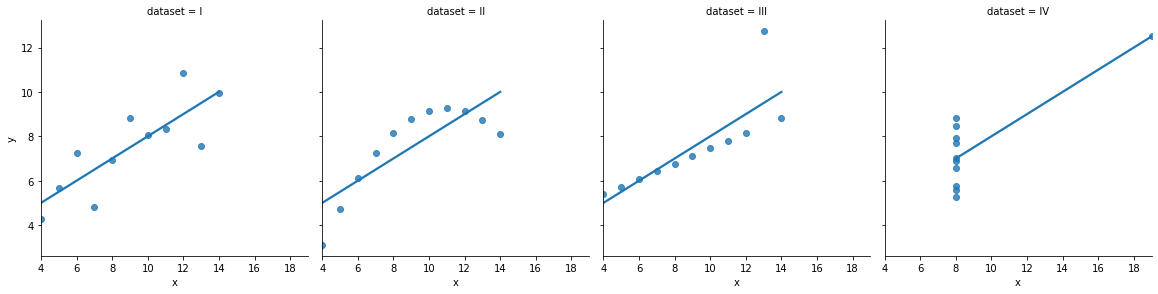

In [6]:
sns.lmplot(x="x",
           y="y",
           col="dataset",
           data=df_anscombe,
           ci=None,
           height=4);

A linear relationship between `'x'` and `'y'` is given in the first and third sub-data set. In the second, the connection seems to be of a more square nature, whereas in the fourth there is no connection.

Actually, you should only use a linear regression for the first and third data set in Anscombe's quartet. In the latter case, you could use what's referred to as a robust regression to ensure that the outlier's influence is reduced. You can find more on the [relevant page in the `sklearn` documentation](https://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors). We will also discuss robust metrics and regressions in a later chapter.

In the case of the second partial data set, it is advisable to convert the `'x'` values into their square. After that, you could continue with a linear regression. This comes under *feature engineering*, which we're also saving for a later chapter.

In the fourth sub-data set there is no correlation between the `'x'` and `'y'` values except for one outlier. Linear regression is not suitable here.

You can already see all these insights in the scatterplot with the regression line. However, in order to gain similar insights with more complicated models, the residual plot has become widely accepted. Remember that a residual is the vertical distance between the regression line and the data point. In the first sub-data set of Anscombe's quartet it would look like this:


In [7]:
# extract data for first quarter of anscombe's quartet
mask = df_anscombe.loc[:, 'dataset']=='I'
df_anscombe_cat = df_anscombe.loc[mask, :]

# choose model
from sklearn.linear_model import LinearRegression

# instantiate model
model_cat = LinearRegression()
    
df_anscombe_cat = df_anscombe.loc[mask, :]

features = df_anscombe_cat.loc[:, ['x']]
target = df_anscombe_cat.loc[:, 'y']
    
# model fitting
model_cat.fit(features, target)
    
# model predictions
target_pred = model_cat.predict(features)
residuals = target - target_pred

residuals

0     0.039000
1    -0.050818
2    -1.921273
3     1.309091
4    -0.171091
5    -0.041364
6     1.239364
7    -0.740455
8     1.838818
9    -1.680727
10    0.179455
Name: y, dtype: float64

`residuals` now includes the difference between the predicted `'y'` values and the actual measured `'y'` values. Remember that a residual is the vertical distance between the regression line and the data point.

A residual plot shows the residuals on the y-axis and the predicted values of the target variable on the x-axis. The zero line shows a perfect prediction. The further a data point is from the zero line, the worse the prediction and the more it influences the regression line.


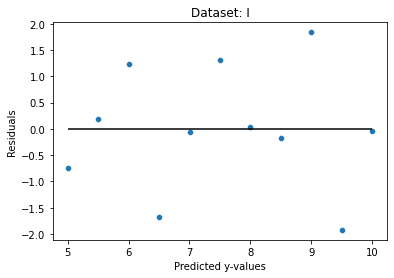

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

sns.scatterplot(x=target_pred,
                y=residuals,
                ax=ax)
    
# labels
ax.set(xlabel='Predicted y-values',
           ylabel='Residuals',
           title='Dataset: I')
    
# zero line
ax.hlines(y=0,
          xmin=target_pred.min(),
          xmax=target_pred.max(),
          color='black')

The residual plot looks roughly like you would want it to look for a linear regression. There's no identifiable structure in the residuals. They appear to be randomly scattered around the zero line. The assumption of a linear relationship between feature and target variable seems to be correct.

So what does it look like for the other sub-data sets from Anscombe's quartet? Create a *figure* with four *axes*. Each *axes* should contain the residual plot of a sub-data set.


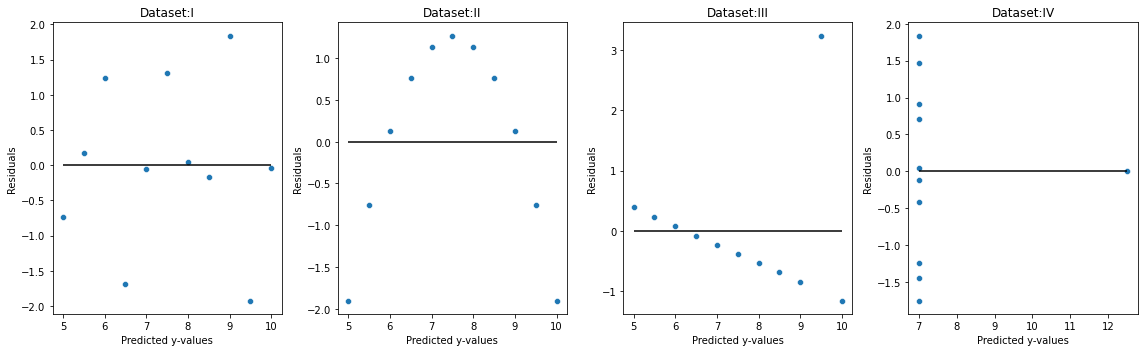

In [9]:
from sklearn.linear_model import LinearRegression
fig, axs = plt.subplots(ncols=4, figsize=[16, 5])
model_cat = LinearRegression()

categories = {
    'I' : 0,
    'II' : 1,
    'III' : 2,
    'IV' : 3,   
}

for category in df_anscombe.loc[:, 'dataset'].unique():
    mask = df_anscombe.loc[:, 'dataset'] == category

    features = df_anscombe.loc[mask, ['x']]
    target = df_anscombe.loc[mask, 'y']

    # model fitting
    model_cat.fit(features, target)

    # model predictions
    target_pred = model_cat.predict(features)
    residuals = target - target_pred

    numericCateory = categories[category]
    sns.scatterplot(x=target_pred,
                    y=residuals,
                    ax=axs[categories[category]])

    # labels
    axs[numericCateory].set(xlabel='Predicted y-values',
               ylabel='Residuals',
               title='Dataset:{0}'.format(category))

    # zero line
    axs[numericCateory].hlines(y=0,
              xmin=target_pred.min(),
              xmax=target_pred.max(),
              color='black')

    fig.tight_layout()

The *figure* should now look something like this:

![residuals plot](1_01_04_pic1.png)


In the residual plot of the second and third sub-data set, you can see very clear structures: The residuals increase and decrease again in the second case, or constantly decrease in the third case. This kind of structure is an indication that a different model might be able to model the data better, as we mentioned above. 

In the last residual plot, there is no random distribution around the zero line. Instead, a value of 7 is predicted for almost all data points with variable residuals.


**Congratulations:** You've learned a method for looking at the residuals of a regression. In the next section we'll look at how to use the residual graphs to check more  assumptions of the linear regression.


With the help of the residuals we can also calculate the last two assumptions of the linear regression:

3. The residuals are normally distributed
4. The residuals have a constant variance

The normal distribution of the residuals can be best estimated with the help of a histogram or a distribution plot.
Use `sns.distplot()` to plot the distribution of the residuals. Proceed exactly as you did with your last visualization. Add a second row with the corresponding *distplot* of the sub-data sets and label this.

You might see four `FutureWarnings` referring to the use of `sns.distplot` which you can ignore.

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

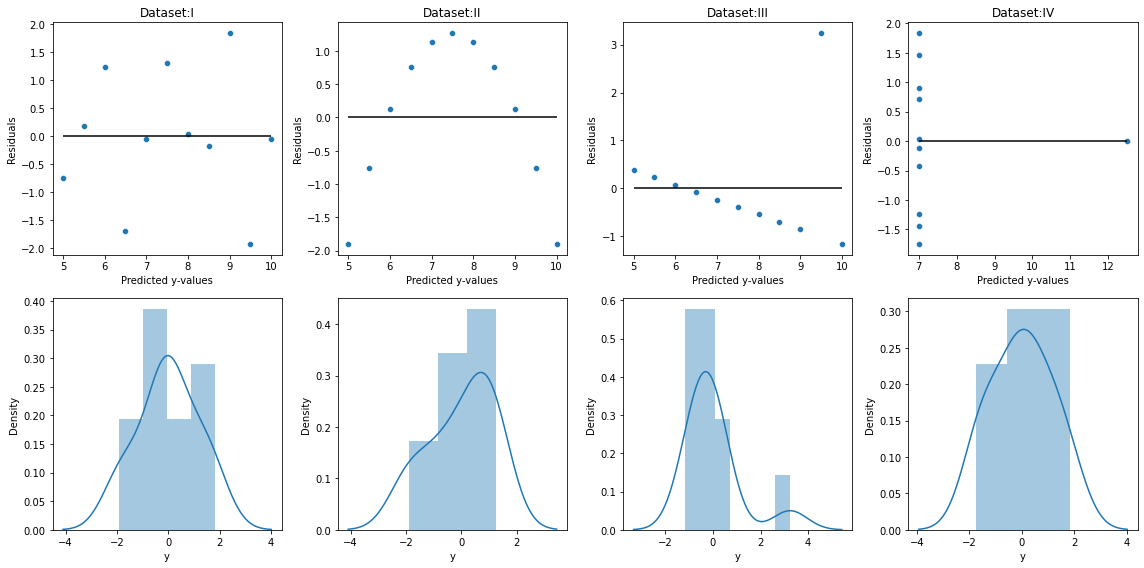

In [10]:
fig, axs = plt.subplots(ncols=4,nrows=2, figsize=[16, 8]) 

for category in df_anscombe.loc[:, 'dataset'].unique():
    mask = df_anscombe.loc[:, 'dataset'] == category
    features = df_anscombe.loc[mask, ['x']]
    target = df_anscombe.loc[mask, 'y']

    # model fitting
    model_cat.fit(features, target)

    # model predictions
    target_pred = model_cat.predict(features)
    residuals = target - target_pred
    numericCateory = categories[category]

    sns.scatterplot(x=target_pred,
                    y=residuals,
                    ax=axs[0,numericCateory])

    # labels
    axs[0,numericCateory].set(xlabel='Predicted y-values',
               ylabel='Residuals',
               title='Dataset:{0}'.format(category))

    # zero line
    axs[0,numericCateory].hlines(y=0,
              xmin=target_pred.min(),
              xmax=target_pred.max(),
              color='black')
    
    sns.distplot(residuals, ax=axs[1,numericCateory]   )

    fig.tight_layout()



The *figure* should now look something like this:


<img src="01_01_04_pic2_en.png">

Sub-data set I and IV seem to be normally distributed and therefore meet the normal distribution assumption. In sub-data set II the distribution curve is strongly skewed to the right and in set III there is a second peak due to the outlier. Both these factors indicate that the normal distribution assumption has not been met here.

Now let's look at the final assumption of the linear regression. The assumption of constant variance in the residuals.
This assumption states that the errors for each predicted value of Y should have a similar variance. The regression should therefore be similarly accurate or innacurate for small predictive values as for large values. The technical term for this is **homoscedasticity**. You can recognize homoscedasticity by the fact that all the residuals lie in a parallel corridor around the value zero.

If the corridor is not equally thick, i.e. wedge-shaped either increasing or decreasing, is not homoscedasticity but heteroscedasticity. This is the case in sub-data set IV. The dispersion of the errors around the value 7 is much larger than around the value 13.


**Congratulations:** You have learned the most important assumptions of the linear regression model:

1. The data points are independent from each other
2. There is a linear dependency between feature and target
3. The residuals are normally distributed
4. The residuals have a constant variance

Now you know how to make these assumptions with residual plots. We can apply this knowledge in the next lesson when it comes to linear regression with several features at once: multiple linear regression.


**Remember:**
* Residuals are the distance between prediction and reality
* A residual plot shows the residuals in connection with the predictions.
* If you do not see a random scattering in the residual plot, you should use an alternative model.


**Literature:**
If you would like to delve deeper into the subject matter of this chapter, we recommend the following source(s):
* Rencher, Alvin C. and Schaalje, Bruce G. 2008. *Linear models in statistics*. Hoboken: Wiley, 2008. p. 127 pp.


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
